In [1]:
import glob
import numpy as np
import torch
import torch.nn.functional as F
import os

import overlap_cluster

import tqdm
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm

/home/sidd_s/miniconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Compute Overlap Clustering for single image

In [6]:
device = torch.device('cuda:1')

n_clusters = 20 

# single image 
# img_path = '/home/sidd_s/scratch/dataset/cityscapes/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit.png'
img_path = '/home/sidd_s/scratch/dataset/acdc_trainval/rgb_anon/night/val_ref/GOPR0351/GOPR0351_frame_000033_rgb_ref_anon.png'
img = np.array(Image.open(img_path))

print(img.shape)

img_down = F.avg_pool2d(torch.from_numpy(img).permute(2, 0, 1).float().unsqueeze(0) / 255., kernel_size=7, stride=4, padding=3).squeeze(0).numpy()

print(img_down.shape)

# Run overlap clustering -- hyperparameters can vary from location to laction
p,mean,var,prior = overlap_cluster.run_clustering(img_down, n_classes=20, radius=30, n_iter=30, stride=1, warmup_steps=0, warmup_radius=0, device=device)

clusters = np.argmax(p, axis=0)[np.newaxis,:,:]
clusters = F.interpolate(torch.from_numpy(clusters).float().unsqueeze(0), scale_factor=4, mode='nearest').squeeze(0).numpy()

# clusters = Image.fromarray(clusters)
# clusters.save('cluster_trial.png')

(1080, 1920, 3)
(3, 270, 480)


100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.24it/s]


In [16]:
clus = clusters.transpose((1,2,0))[:, :, 0]
clus.shape
# clusters.shape
# plt.imsave('try.png', clus)

(1080, 1920)

### Night image clustering 

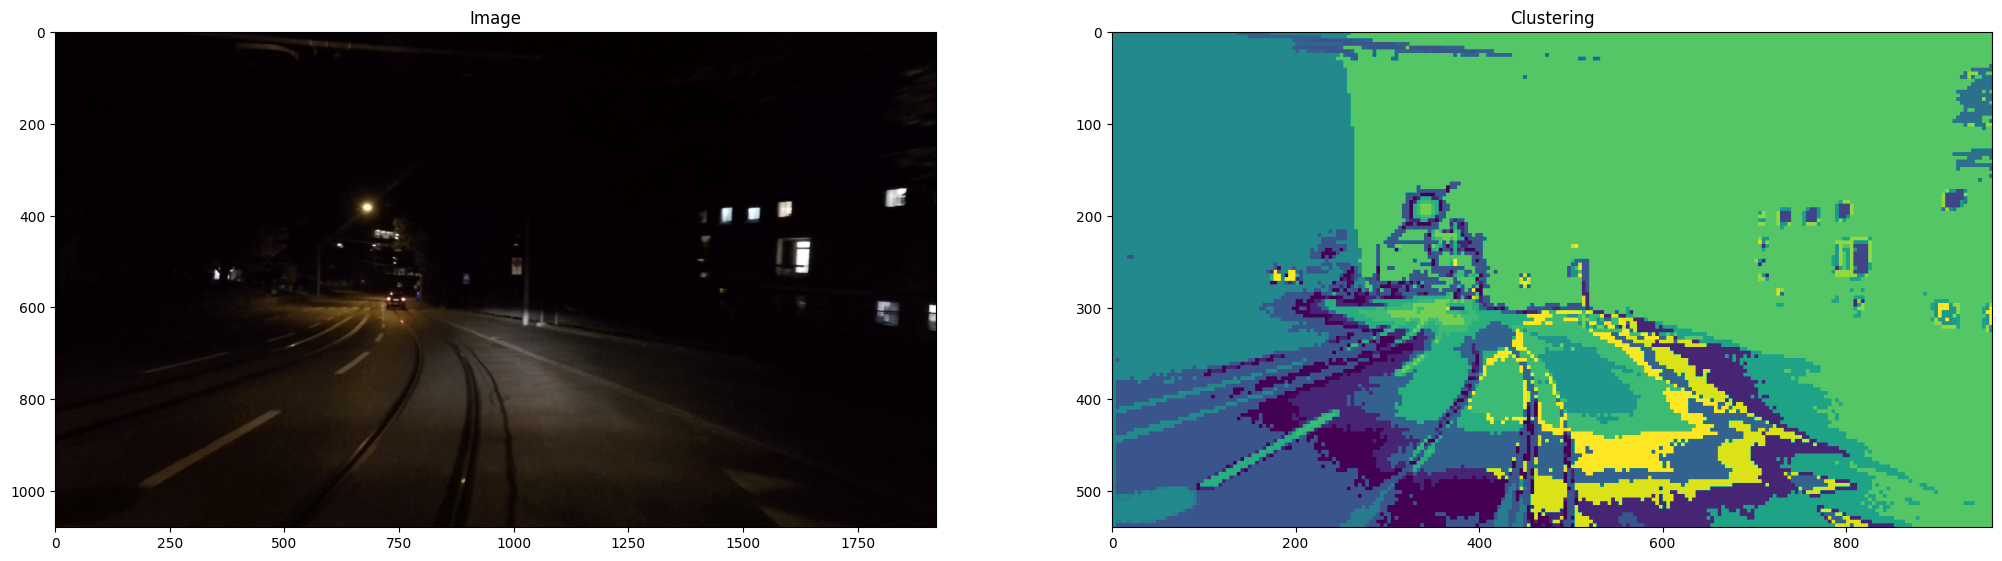

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(25,15))
ax[0].imshow(img)
ax[0].set_title('Image')

ax[1].imshow(clusters.transpose([1,2,0]))
ax[1].set_title('Clustering')
plt.show()

### Day Ref of Night image clustering

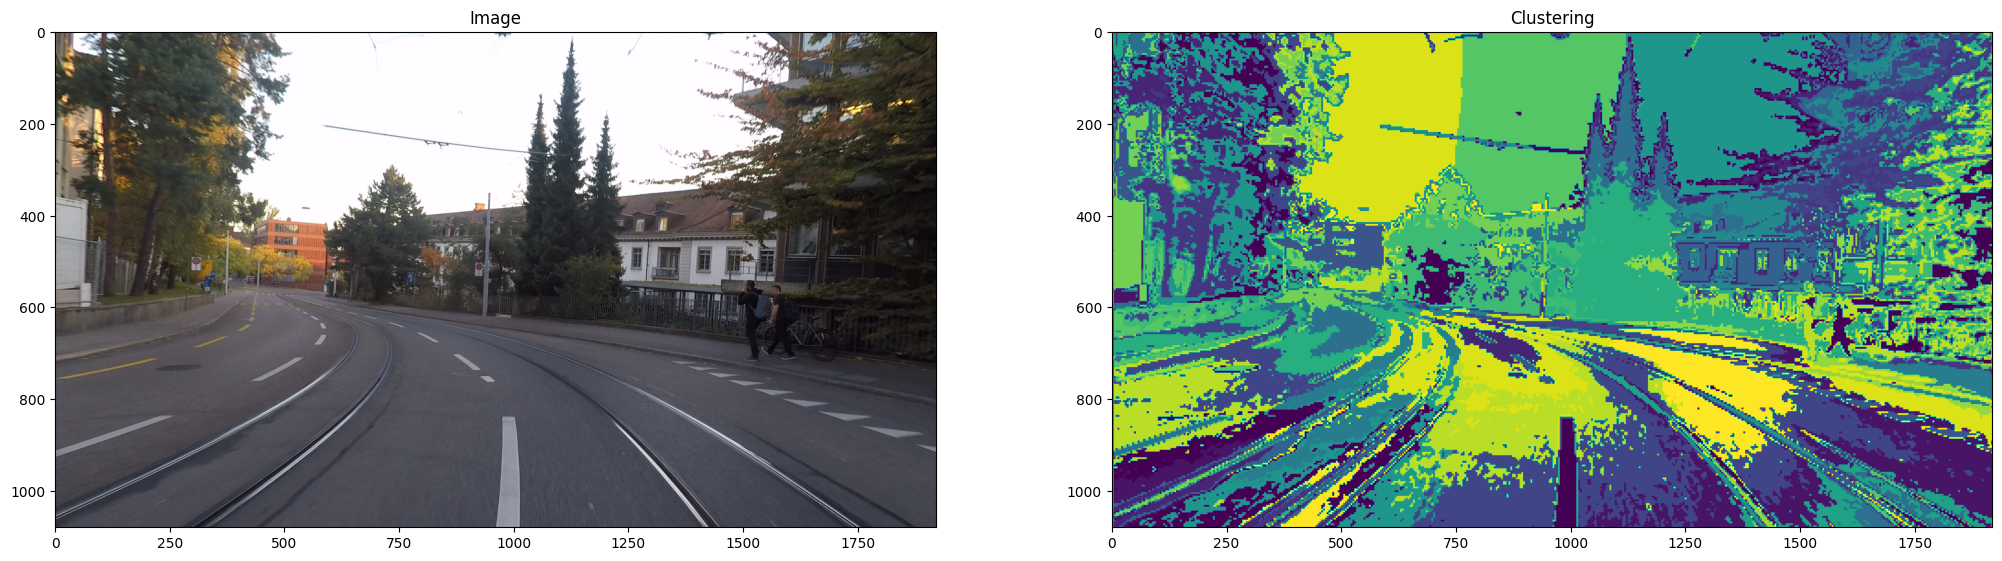

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(25,15))
ax[0].imshow(img)
ax[0].set_title('Image')

ax[1].imshow(clusters.transpose([1,2,0]))
ax[1].set_title('Clustering')
plt.show()

### Cityscapes Day image clustering

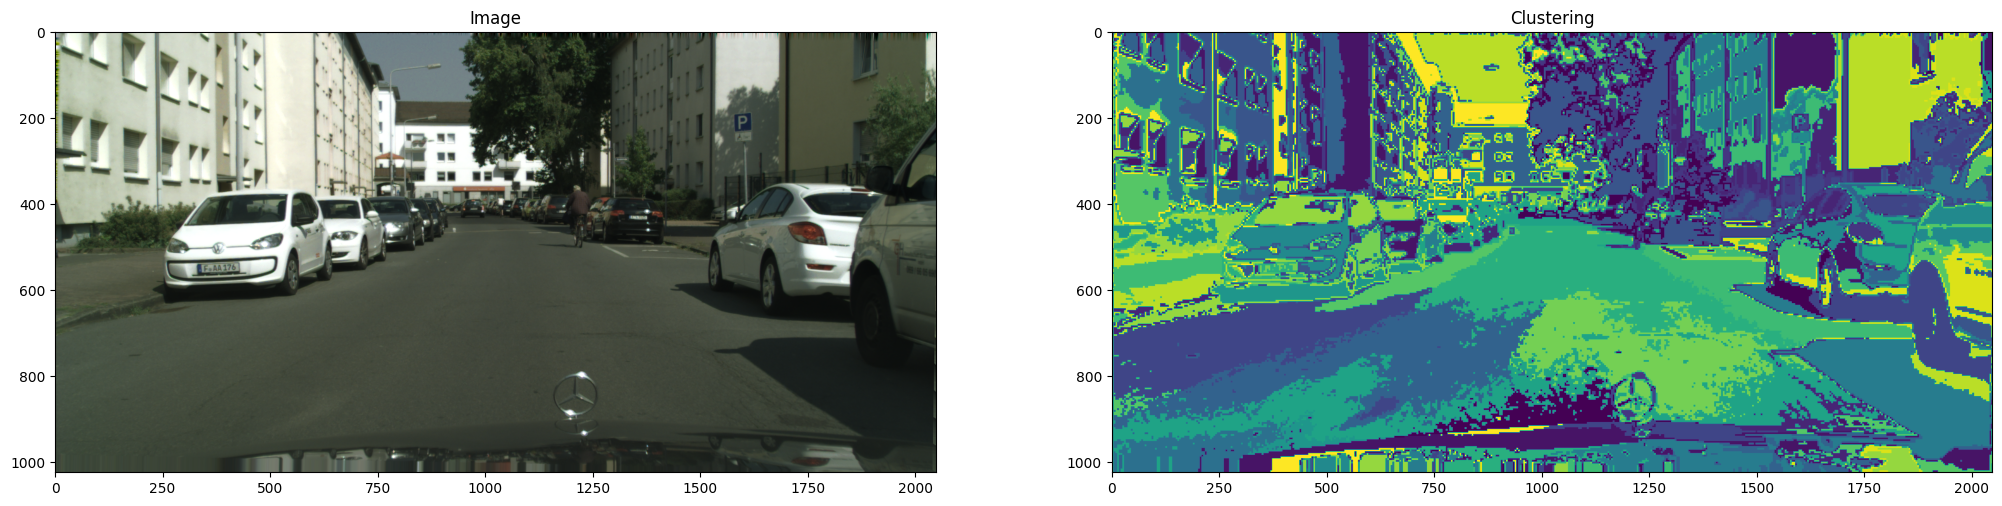

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(25,15))
ax[0].imshow(img)
ax[0].set_title('Image')

ax[1].imshow(clusters.transpose([1,2,0]))
ax[1].set_title('Clustering')
plt.show()

## Computer clustering for the Dataset --- Day Reference images of Night Images

In [17]:
img_paths = glob.glob('/home/sidd_s/scratch/dataset/dark_zurich_val/rgb_anon/val_ref/day/GOPR0356_ref/*.png')
img_paths.sort()

n_clusters = 20 
save_path = '/home/sidd_s/scratch/dataset/dark_zurich_val/clusters'

for i, path in enumerate(img_paths): 
    img = np.array(Image.open(path))
    img_down = F.avg_pool2d(torch.from_numpy(img).permute(2, 0, 1).float().unsqueeze(0) / 255., kernel_size=7, stride=4, padding=3).squeeze(0).numpy()

    # Run overlap clustering -- hyperparameters can vary from location to laction
    p,mean,var,prior = overlap_cluster.run_clustering(img_down, n_classes=20, radius=30, n_iter=30, stride=1, warmup_steps=0, warmup_radius=0, device=device)

    clusters = np.argmax(p, axis=0)[np.newaxis,:,:]
    clusters = F.interpolate(torch.from_numpy(clusters).float().unsqueeze(0), scale_factor=4, mode='nearest').squeeze(0).numpy()
    
    # clusters = Image.fromarray(clusters)
    # clusters.save('cluster_trial.png') 
    
    name = path.split('/')[-1]
    save_path_img = os.path.join(save_path, name) 
    clusters = clusters.transpose((1,2,0))[:,:,0]
    # print(clusters.shape)
    # clusters = Image.fromarray(clusters, 'L') 
    # clusters.save(save_path_img)
    plt.imsave(save_path_img, clusters, cmap = 'plasma')

print('images saved')

100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.23it/s]


images saved
